# Reading and Understanding the Data

In [139]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from feature_engine.outliers import OutlierTrimmer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

In [140]:
data = pd.read_csv('OnlineRetail.csv', encoding='latin-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [141]:
data.shape

(541909, 8)

In [142]:
data.duplicated().sum()

5268

In [143]:
data.drop_duplicates(inplace = True)

In [144]:
data.shape

(536641, 8)

In [145]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [147]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [148]:
data.isnull().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002709
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.251634
Country        0.000000
dtype: float64

In [149]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [150]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [151]:
data.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001241,-0.003457
UnitPrice,-0.001241,1.000000,-0.004524
CustomerID,-0.003457,-0.004524,1.000000


# Data Cleaning and Preparation

In [152]:
data.dropna(inplace = True)

In [153]:
data.shape

(401604, 8)

In [154]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [155]:
data = data.loc[data["UnitPrice"] >0]
data = data.loc[data["Quantity"] >0 ]

In [156]:
data.shape

(392692, 8)

In [157]:
data['Total_price']=data.UnitPrice * data.Quantity

In [158]:
data.drop(columns = ['Quantity','UnitPrice'], inplace = True)

In [159]:
data.head()

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,01-12-2010 08:26,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,01-12-2010 08:26,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,01-12-2010 08:26,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,01-12-2010 08:26,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,01-12-2010 08:26,17850.0,United Kingdom,20.34


In [160]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [161]:
data['Recency'] = (max(data['InvoiceDate']) - data['InvoiceDate']).dt.days
data.head()

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country,Total_price,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,373


In [162]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
InvoiceDate    datetime64[ns]
CustomerID            float64
Country                object
Total_price           float64
Recency                 int64
dtype: object

In [163]:
data1 = data.groupby('CustomerID')['Total_price'].sum().reset_index()

In [164]:
data2 = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
data2.columns = ['CustomerID', 'Frequency']

In [165]:
data4 = data.groupby('CustomerID')['Recency'].min().reset_index()

In [166]:
data4.Recency = data4.Recency.astype('int')

In [167]:
data3 = pd.merge(data1, data2, on='CustomerID', how='inner')

In [168]:
retail = pd.merge(data3, data4, on='CustomerID', how='inner')
retail.head()

,CustomerID,Total_price,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [169]:
retail.shape

(4338, 4)

In [170]:
retail.corr()

,CustomerID,Total_price,Frequency,Recency
CustomerID,1.000000,-0.013822,-0.002930,0.007631
Total_price,-0.013822,1.000000,0.425282,-0.121831
Frequency,-0.002930,0.425282,1.000000,-0.206444
Recency,0.007631,-0.121831,-0.206444,1.000000


In [171]:
retail.drop(columns = ['CustomerID'], inplace = True)

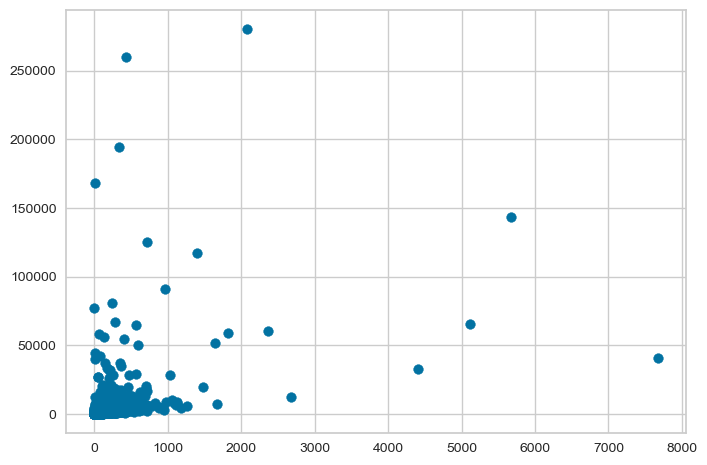

In [172]:
plt.scatter(x=retail.Frequency,y=retail.Total_price)

# Outlier Removing 

In [173]:
def plot_hist(retail, col):
    plt.figure(figsize=(6, 5))
    plt.hist(retail[col], bins=30)
    plt.title("Distribution of " + col)
    return plt.show()

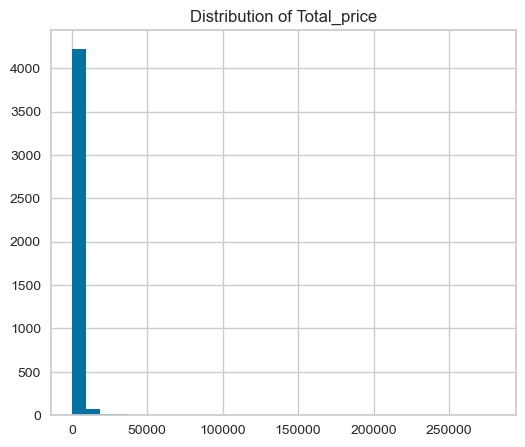

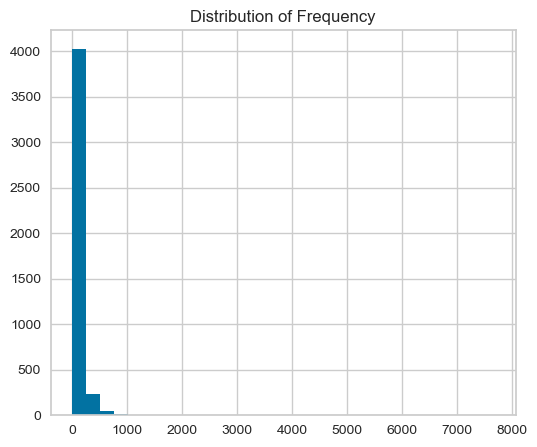

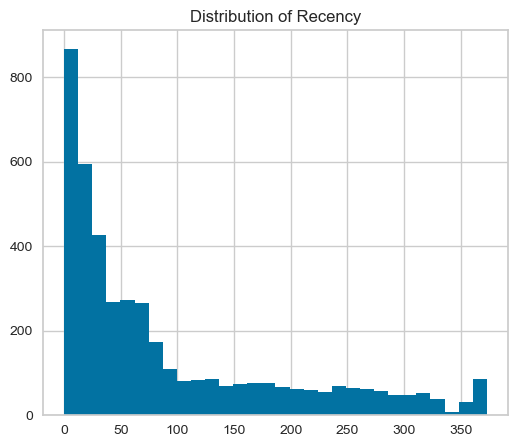

In [174]:
for i in retail.columns:
    plot_hist(retail,i)

In [175]:
trimmer = OutlierTrimmer(
    fold = 1.5, capping_method='iqr', tail='right', variables = ['Total_price'])

trimmer.fit(retail)
retail1 = trimmer.transform(retail)

In [176]:
print("train data shape before removing outliers:", retail.shape)
print("test data shape before removing outliers:", retail1.shape)

train data shape before removing outliers: (4338, 3)
test data shape before removing outliers: (3913, 3)


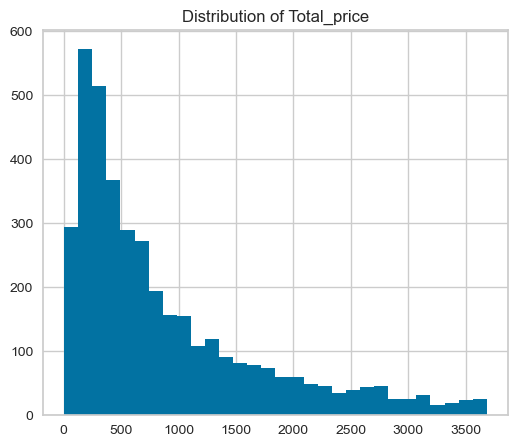

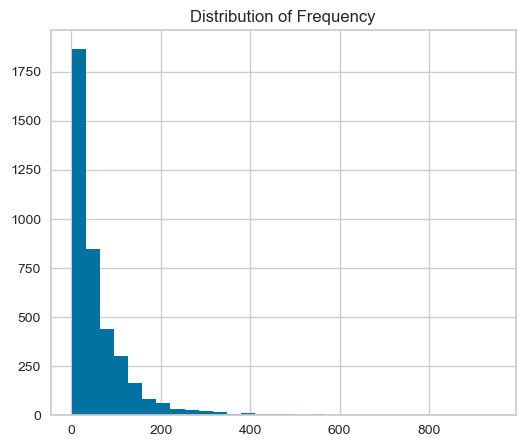

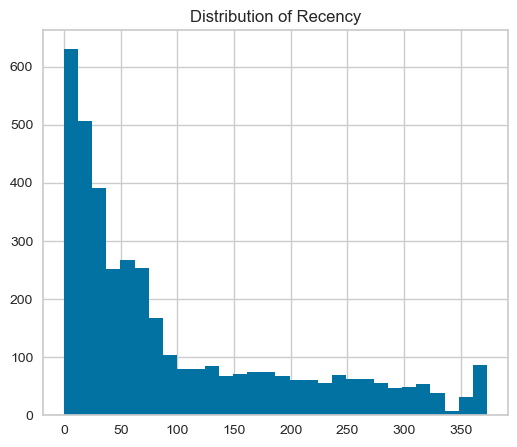

In [177]:
for i in retail1.columns:
    plot_hist(retail1,i)

# PERFORMING FEATURE SCALING

In [178]:
scaler = MinMaxScaler()
scaler.fit(retail1)
retail1_scaled = scaler.transform(retail1)

In [179]:
retail1_scaled

array([[0.48734685, 0.03171247, 0.19839142],
       [0.47656184, 0.07610994, 0.04825737],
       [0.08984786, 0.01691332, 0.82841823],
       ...,
       [0.04736271, 0.01162791, 0.01876676],
       [0.55481494, 0.76109937, 0.0080429 ],
       [0.49822696, 0.07293869, 0.11260054]])

In [180]:
retail2 = pd.DataFrame(retail1_scaled)

In [181]:
retail2

,0,1,2
0,0.487347,0.031712,0.198391
1,0.476562,0.076110,0.048257
2,0.089848,0.016913,0.828418
3,0.679950,0.088795,0.093834
4,0.023165,0.003171,0.544236
...,...,...,...
3908,0.048056,0.009514,0.742627
3909,0.020942,0.006342,0.482574
3910,0.047363,0.011628,0.018767
3911,0.554815,0.761099,0.008043


# Model Building and Visualization of Predictions

# Kmeans

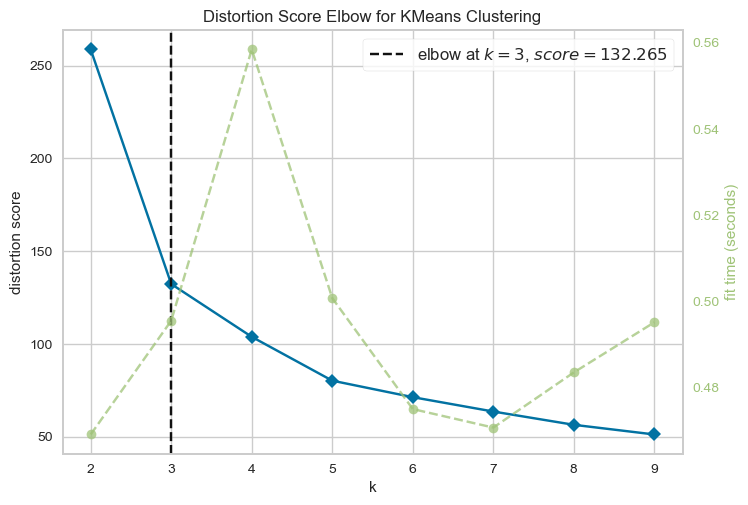

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [182]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(retail2)        
visualizer.show()

In [183]:
kmeans = KMeans(n_clusters=3)

In [184]:
kmeans_predictions = kmeans.fit_predict(retail2)

In [185]:
kmeans_predictions

array([1, 1, 0, ..., 2, 1, 1])

In [186]:
retail2['predictions'] = kmeans_predictions

In [187]:
retail2.predictions.value_counts()

2    2118
0    1005
1     790
Name: predictions, dtype: int64

In [188]:
for i in retail2.columns:
    print(retail2.groupby('predictions')[i].mean())

predictions
0    0.106724
1    0.618697
2    0.160455
Name: 0, dtype: float64
predictions
0    0.025400
1    0.156281
2    0.046315
Name: 1, dtype: float64
predictions
0    0.675219
1    0.101123
2    0.131842
Name: 2, dtype: float64
predictions
0    0.0
1    1.0
2    2.0
Name: predictions, dtype: float64


In [189]:
print('silhouette_score:',silhouette_score(retail2,kmeans_predictions))

silhouette_score: 0.8084068574438757


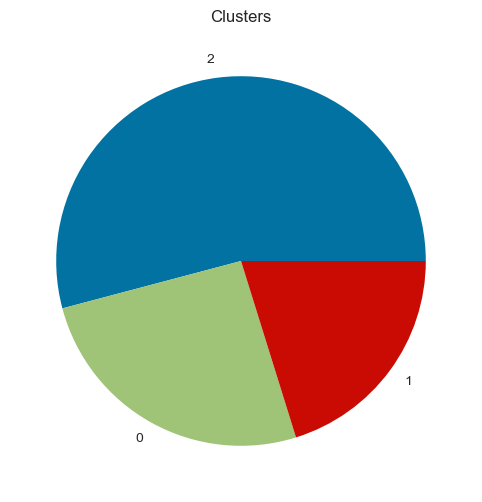

In [190]:
cluster_counts=retail2.predictions.value_counts(normalize=True)
plt.figure(figsize=(10,6))
plt.pie(cluster_counts.values,labels=cluster_counts.index,)
plt.title("Clusters")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter plot of data')

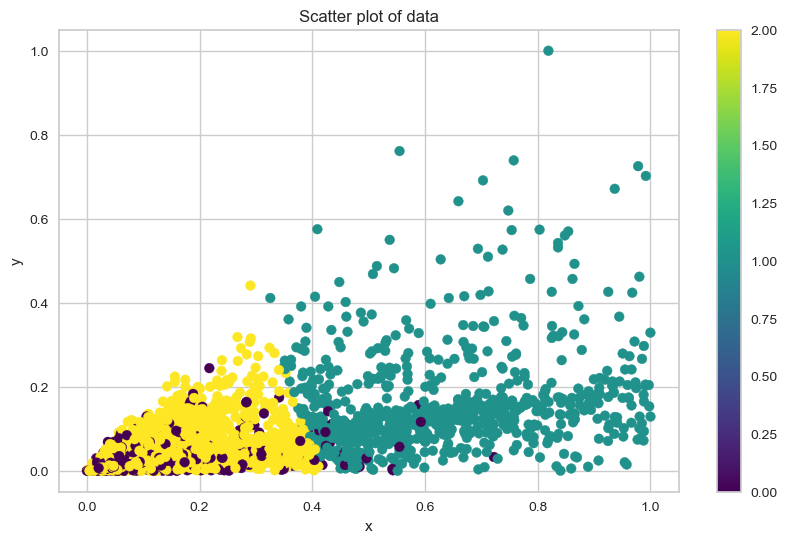

In [191]:
plt.figure(figsize=(10,6))
plt.scatter(retail2.loc[:,0],retail2.loc[:,1],c=retail2.predictions ,cmap='viridis')
plt.colorbar() 
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of data')

In [192]:
retail2

,0,1,2,predictions
0,0.487347,0.031712,0.198391,1
1,0.476562,0.076110,0.048257,1
2,0.089848,0.016913,0.828418,0
3,0.679950,0.088795,0.093834,1
4,0.023165,0.003171,0.544236,0
...,...,...,...,...
3908,0.048056,0.009514,0.742627,0
3909,0.020942,0.006342,0.482574,0
3910,0.047363,0.011628,0.018767,2
3911,0.554815,0.761099,0.008043,1


In [193]:
retail2.groupby("predictions").max()

,0,1,2
predictions,,,
0,0.722122,0.244186,1.000000
1,1.000000,1.000000,0.817694
2,0.410925,0.440803,0.418231


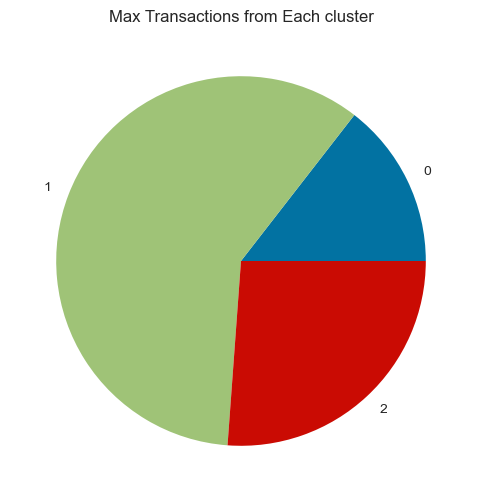

In [194]:
a=retail2.groupby("predictions").max()[1]
plt.figure(figsize=(10,6))
plt.pie(a.values,labels=a.index,)
plt.title("Max Transactions from Each cluster")
plt.show()

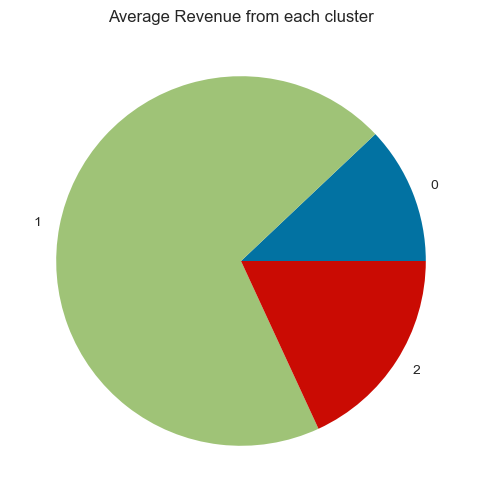

In [195]:
b=retail2.groupby("predictions").mean()[0]
plt.figure(figsize=(10,6))
plt.pie(b.values,labels=b.index,)
plt.title("Average Revenue from each cluster")
plt.show()

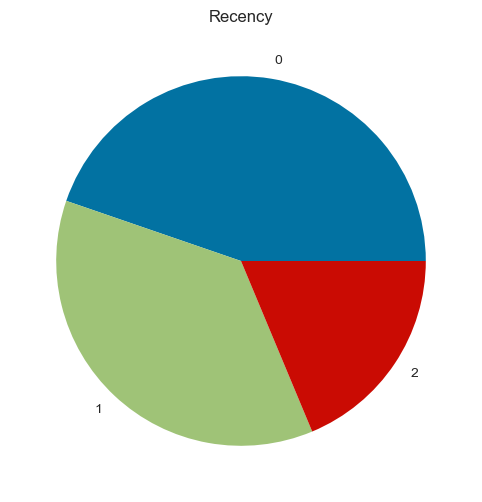

In [196]:
b=retail2.groupby("predictions").max()[2]
plt.figure(figsize=(10,6))
plt.pie(b.values,labels=b.index,)
plt.title("Recency")
plt.show()

# DBSCAN

In [200]:
retail2.columns = retail2.columns.astype(str)

In [204]:
dbscan = DBSCAN(eps=0.5, min_samples = 10)
dbscan_predictions = dbscan.fit_predict(retail2)

In [208]:
print('silhouette_score:',silhouette_score(retail2,dbscan_predictions))

silhouette_score: 0.8084068574438757
